In [ ]:
#Importacion de librerias
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYC-Airbnb-2023-data.csv',delimiter=',',header=0)
d1 = datos
print(d1)

                                                     id  \
0                                                  2595   
1                                                  5121   
2                                                  5203   
3                                                  5178   
4     5136,"Large Sunny Brooklyn Duplex, Patio + Gar...   
...                                                 ...   
2451                                            3677436   
2452                                            3749971   
2453                                            3677769   
2454                                            3752035   
2455                                            3511778   

                                    name     host_id  host_name  \
0                  Skylit Midtown Castle      2845.0   Jennifer   
1                        BlissArtsSpace!      7356.0      Garon   
2     Cozy Clean Guest Room - Family Apt      7490.0  MaryEllen   
3       Large Furnished

In [ ]:
#Se rellenan los datos "NaN" sustituyendolos por el promedio de la columna
d1.fillna(d1.mean(), inplace=True)
print(d1)


                                                     id  \
0                                                  2595   
1                                                  5121   
2                                                  5203   
3                                                  5178   
4     5136,"Large Sunny Brooklyn Duplex, Patio + Gar...   
...                                                 ...   
2451                                            3677436   
2452                                            3749971   
2453                                            3677769   
2454                                            3752035   
2455                                            3511778   

                                    name       host_id  host_name  \
0                  Skylit Midtown Castle  2.845000e+03   Jennifer   
1                        BlissArtsSpace!  7.356000e+03      Garon   
2     Cozy Clean Guest Room - Family Apt  7.490000e+03  MaryEllen   
3       Large F

<ipython-input-4-f4fa8daa1219>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d1.fillna(d1.mean(), inplace=True)


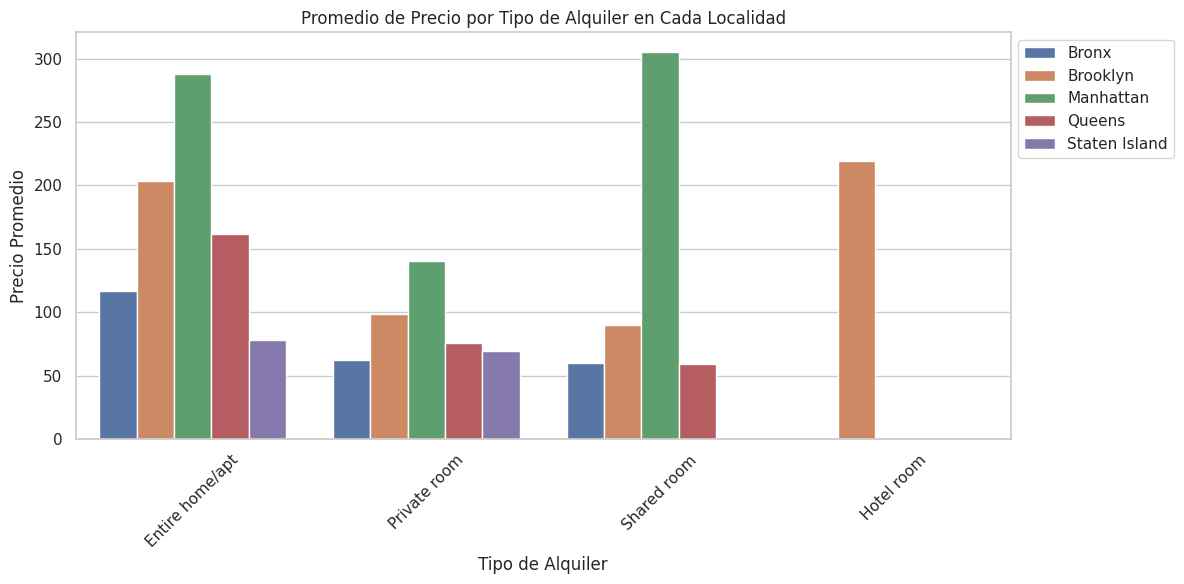

In [ ]:
# - Promedio de precios por tipo de alquiler en cada localidad
prom_barrios = d1.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="room_type", y="price", hue="neighbourhood_group", data=prom_barrios)


plt.title("Promedio de Precio por Tipo de Alquiler en Cada Localidad")
plt.xlabel("Tipo de Alquiler")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()

***Promedio de precios por tipo de alquiler en cada localidad***: Viendo los resultados podemos ver que el tipo de alquiler de habitación de hotel solo se encuentra en una sola localidad, mientras que el alquiler entero y habitación privada tiene mayor oferta en todas las localidades con promedios distintos en cada una de ellas.


<ipython-input-5-4f7546534968>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="room_type", y="price", data=most_rent, ci=None)


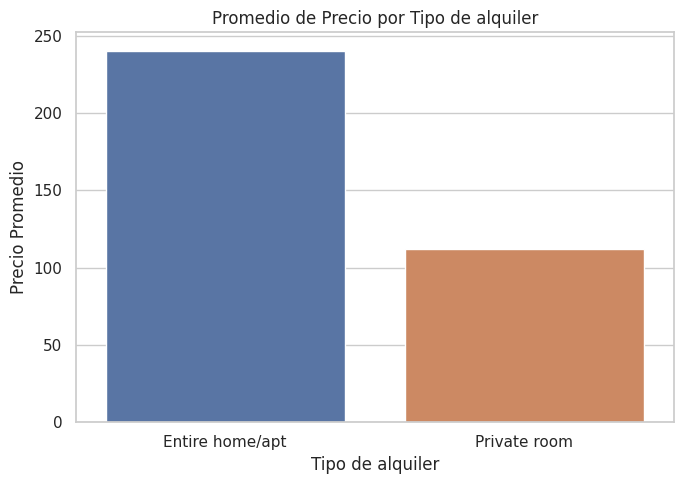

In [ ]:
# - Promedio de precios segun el tipo de alquiler mas ofertado.
most_rent = d1[d1['room_type'].isin(['Entire home/apt', 'Private room'])]

sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))
sns.barplot(x="room_type", y="price", data=most_rent, ci=None)
plt.title("Promedio de Precio por Tipo de alquiler")
plt.xlabel("Tipo de alquiler")
plt.ylabel("Precio Promedio")

plt.tight_layout()
plt.show()

## **SELECCION DE FEATURES / REGRESION / ANALISIS DE METRICAS / CONCLUSIONES**

In [ ]:

from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.formula.api as sm

import os

In [ ]:
print(most_rent)

           id                                name     host_id  host_name  \
0        2595               Skylit Midtown Castle      2845.0   Jennifer   
1        5121                     BlissArtsSpace!      7356.0      Garon   
2        5203  Cozy Clean Guest Room - Family Apt      7490.0  MaryEllen   
3        5178    Large Furnished Room Near B'way　      8967.0   Shunichi   
6        5586  Rooftop Deck/City Views. Great Apt      8526.0      Susan   
...       ...                                 ...         ...        ...   
2451  3677436   Spacious 1BR in heart of Brooklyn  18678912.0      Shena   
2452  3749971  Williamsburg Apt. w/ private patio  10094431.0      Sofia   
2453  3677769       Beautiful Large Sunny Bedroom  18681479.0     Pamela   
2454  3752035   New & Modern 2 BR Brownstone Apt.  14961638.0      Elito   
2455  3511778    10th St / W Village  Junior Loft  17681072.0     Brooks   

     neighbourhood_group       neighbourhood  latitude  longitude  \
0              Man

In [ ]:
# Ajuste de Data Frame para valores numericos
d2 = most_rent
# Codigo numerico de los barrios
codigo_barrio_dic = {
    'Manhattan': 100,
    'Brooklyn': 200,
    'Queens': 300,
    'Bronx': 400}

room_type_dic = {
    'Entire home/apt': 1100,
    'Private room': 1200,
    'Shared room': 1300,
    'Hotel room': 1400}
# asignacion de codigos en una nueva columna
d2['codigo_barrio']= most_rent['neighbourhood_group'].map(codigo_barrio_dic)
d2['codigo_room']= most_rent['room_type'].map(room_type_dic)
d2['codigo_barrio'] = pd.to_numeric(d2['codigo_barrio'], downcast='integer', errors='coerce')

# completa los campos categoricos con la moda
nan_neighbourhood_group = d2['neighbourhood_group'].mode()[0]
nan_neighbourhood = d2['neighbourhood'].mode()[0]
d2['neighbourhood_group'].fillna(nan_neighbourhood_group, inplace=True)
d2['neighbourhood'].fillna(nan_neighbourhood, inplace=True)
d2['license'].fillna('0', inplace=True)

#elimina los campos vacios
d2 = d2.dropna()


print(d2)

           id                                name     host_id  host_name  \
0        2595               Skylit Midtown Castle      2845.0   Jennifer   
1        5121                     BlissArtsSpace!      7356.0      Garon   
2        5203  Cozy Clean Guest Room - Family Apt      7490.0  MaryEllen   
3        5178    Large Furnished Room Near B'way　      8967.0   Shunichi   
6        5586  Rooftop Deck/City Views. Great Apt      8526.0      Susan   
...       ...                                 ...         ...        ...   
2451  3677436   Spacious 1BR in heart of Brooklyn  18678912.0      Shena   
2452  3749971  Williamsburg Apt. w/ private patio  10094431.0      Sofia   
2453  3677769       Beautiful Large Sunny Bedroom  18681479.0     Pamela   
2454  3752035   New & Modern 2 BR Brownstone Apt.  14961638.0      Elito   
2455  3511778    10th St / W Village  Junior Loft  17681072.0     Brooks   

     neighbourhood_group       neighbourhood  latitude  longitude  \
0              Man

<ipython-input-8-8a1cfa82add5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['codigo_barrio']= most_rent['neighbourhood_group'].map(codigo_barrio_dic)
<ipython-input-8-8a1cfa82add5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['codigo_room']= most_rent['room_type'].map(room_type_dic)
<ipython-input-8-8a1cfa82add5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
# Ajuste de DataFrame para la seleccion de features

d2['price'] = most_rent.price
features_drop = ["id","name","host_name","neighbourhood_group","neighbourhood","room_type","last_review"]
x = d2.drop(columns=features_drop)       # Matriz de características
y = d2['price']

<ipython-input-9-ab1fe6cbaadc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['price'] = most_rent.price


In [ ]:
x

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,codigo_barrio,codigo_room
0,2845.0,40.75356,-73.98559,150.0,30.0,49.0,0.30,3.0,314.0,1.0,0,100.0,1100
1,7356.0,40.68535,-73.95512,60.0,30.0,50.0,0.30,2.0,365.0,0.0,0,200.0,1200
2,7490.0,40.80380,-73.96751,75.0,2.0,118.0,0.72,1.0,0.0,0.0,0,100.0,1200
3,8967.0,40.76457,-73.98317,68.0,2.0,575.0,3.41,1.0,106.0,52.0,0,100.0,1200
6,8526.0,40.76076,-73.96156,295.0,4.0,45.0,0.27,1.0,1.0,4.0,0,100.0,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,18678912.0,40.63387,-73.96224,103.0,2.0,9.0,0.09,1.0,63.0,1.0,0,200.0,1100
2452,10094431.0,40.71649,-73.96180,115.0,30.0,95.0,0.91,1.0,0.0,0.0,0,200.0,1200
2453,18681479.0,40.74329,-73.92317,75.0,30.0,118.0,1.14,1.0,0.0,0.0,0,300.0,1200
2454,14961638.0,40.68599,-73.95538,181.0,3.0,110.0,1.11,1.0,153.0,22.0,0,200.0,1100


In [ ]:
y

0       150.0
1        60.0
2        75.0
3        68.0
6       295.0
        ...  
2451    103.0
2452    115.0
2453     75.0
2454    181.0
2455    275.0
Name: price, Length: 1841, dtype: float64

In [ ]:
# Método de Bi-directional Elimination (Stepwise)
sfs_stepwise = SFS(LinearRegression(),
                   k_features=6,
                   forward=True,
                   floating=True,
                   scoring='r2',
                   cv=5)
sfs_stepwise.fit(x, y)
selected_features_stepwise = sfs_stepwise.k_feature_names_
print("Bi-directional Elimination (Stepwise) - Características seleccionadas:", selected_features_stepwise)

Bi-directional Elimination (Stepwise) - Características seleccionadas: ('host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews')


In [ ]:
#LIBRERIAS
! pip install chart_studio
import chart_studio.plotly     as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
#CONFIRMACION DE HIPOTESIS NULA
#Regresion lineal - Para confirmar la hipotesis nula de la realcion entre los dias disponibles al año y el precio
modelo_lineal = 'price~availability_365'
lm1   = sm.ols(formula = modelo_lineal, data = d2).fit()
print(lm1.summary())

**Resultado:** Viendo que F< Significancia de F. No es posible rechazar la hipotesis nula, la cual corresponde a que no hay variacion de precio en funcion a los dias disponibles al año de las ofertas.


# **Regresion lineal con seleccion de feature**

In [ ]:
# Features seleccionados:
d2_x = d2[['host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews']]
# Division de datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(d2_x, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()
model.fit(x_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(x_test)
print(d2_x)

         host_id  latitude  longitude  price  minimum_nights  \
0         2845.0  40.75356  -73.98559  150.0            30.0   
1         7356.0  40.68535  -73.95512   60.0            30.0   
2         7490.0  40.80380  -73.96751   75.0             2.0   
3         8967.0  40.76457  -73.98317   68.0             2.0   
6         8526.0  40.76076  -73.96156  295.0             4.0   
...          ...       ...        ...    ...             ...   
2451  18678912.0  40.63387  -73.96224  103.0             2.0   
2452  10094431.0  40.71649  -73.96180  115.0            30.0   
2453  18681479.0  40.74329  -73.92317   75.0            30.0   
2454  14961638.0  40.68599  -73.95538  181.0             3.0   
2455  17681072.0  40.73223  -73.99265  275.0            60.0   

      number_of_reviews  
0                  49.0  
1                  50.0  
2                 118.0  
3                 575.0  
6                  45.0  
...                 ...  
2451                9.0  
2452               95.0

# **Metricas de regresion**

In [ ]:
#MAE
mse = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 7.812682533434914e-10


In [ ]:
#mse
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 3.049355065210942e-18


El MAE y un MSE bajo indica que las predicciones del modelo están más cerca de los valores reales, lo que es deseable.

In [ ]:
#R2
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R^2: {r2}")

R^2: 1.0


 R2 cercano a 1 indicando que el modelo explica una gran parte de la variabilidad en los datos y se ajusta bien a ellos.

# **CONCLUSIONES:**

A pesar de los buenos valores de las métricas de la regresión lineal en base a los features seleccionados, estos no hacen referencia directamente a caracteristicas que condicionen el precio directamente proporcional a los alquileres. sin embargo, los campos de Log y Lat, pueden interpretarse con mayor detalle en una visualizacions GIS para relacionar los precios en funcion de estas coordenadas, lo que validaria la regresión con la seleccion de estos features.